In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

The dataset_file variable must be actualized when a new file is available.

In [0]:
url = 'https://www.ecdc.europa.eu/sites/default/files/documents/'
dataset_file = r'COVID-19-geographic-disbtribution-worldwide-2020-03-13.xls'

df = pd.read_excel(url + dataset_file)

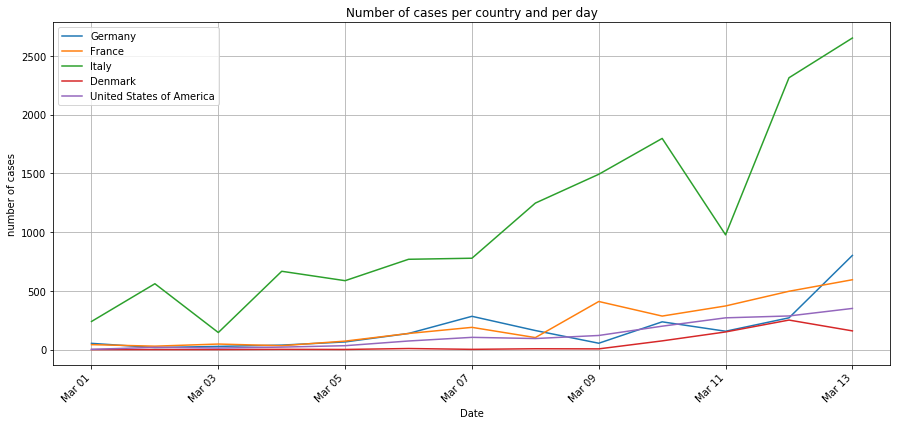

In [4]:
countryList = ['Germany',
               'France',
               'Italy',
               'Denmark',
               'United States of America'
              ]
#countryList = ['China']

startDate = '03/01/2020'

fig, ax = plt.subplots(figsize=(15,7))

for c in countryList:
    ax.plot(df.loc[(df['CountryExp'] == c) & (df['DateRep'] >= startDate), ['DateRep']], \
             df.loc[(df['CountryExp'] == c) & (df['DateRep'] >= startDate), ['NewConfCases']])
ax.set_title('Number of cases per country and per day')
ax.set_xlabel('Date')
ax.set_ylabel('number of cases')
ax.grid(True)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.legend(countryList)
fig.autofmt_xdate(rotation=45)
fig.show()

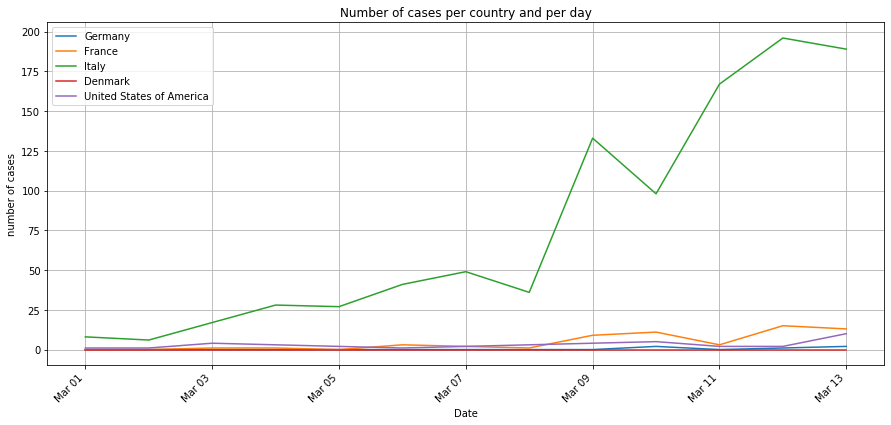

In [6]:
fig, ax = plt.subplots(figsize=(15,7))

for c in countryList:
    ax.plot(df.loc[(df['CountryExp'] == c) & (df['DateRep'] >= startDate), ['DateRep']], \
             df.loc[(df['CountryExp'] == c) & (df['DateRep'] >= startDate), ['NewDeaths']])
ax.set_title('Number of cases per country and per day')
ax.set_xlabel('Date')
ax.set_ylabel('number of cases')
ax.grid(True)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.legend(countryList)
fig.autofmt_xdate(rotation=45)
fig.show()